# Life Expectancy: Exploratory Data Analysis

    The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years

    Goal: Find a set of features that affect Life Expectancy.
1. Data Cleaning
    Q1. Detect and Deal with the Missing values
    Q2. Detect and handle the outliers
2. Data Exploration and Visualization
    Q3. What is the Life Expectancy Country-wise
    Q4. How different dieseases affect life expectancy in developed and developing countries
    Q5. What effect does Schooling and Alcohol have on Life Expectancy
3. Summary



# Imports and Dataset Load


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline

In [34]:
df = pd.read_csv('./life_expectancy.csv')

In [35]:
df.head()

,Country,Year,Status,Life,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Section 1: Data Cleaning

In order to properly clean the data, it is important to understand the variables presented in the data. There are a number of things important to know about each variable:

1. What does the variable mean and what type of variable is it (Nominal/Ordinal/Interval/Ratio)?
2. Does the variable have missing values? If so, what should be done about them?
3. Does the variable have outliers? If so, what should be done about them?

# Dataset Description

This collection is made up of data collected by the World Health Organization from various nations all over the world (WHO for short). The information is a compilation of several indicators for a certain nation and year. In essence, the data is a time series of several metrics divided by nation.

The string values for the columns/variables themselves aren't particularly 'clean,' so here's a little cleaning of the column/variable titles before we go into the variable descriptions.


In [36]:
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols
                    

# Variable Descriptions

1. country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)
2. year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)
3. status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
4. life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year
5. adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

6. infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants
7. alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
8. percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
9. hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
10. measles (Ratio) - number of reported Measles cases per 1000 population
11. bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
12. under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population
13. polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
14. total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure
15. diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
16. hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
17. gdp (Ratio) - Gross Domestic Product per capita
18. population (Ratio) - population of a country
19. thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
20. thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9
21. income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. schooling (Ratio) - average number of years of schooling of a population

As previously indicated, changing the name of the variable thinness 1-19 years to thinness 10-19 years 
would be beneficial because it is a more true representation of what the variable signifies.

In [37]:
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life                             2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [39]:
df.size

64636

In [40]:
df.shape

(2938, 22)

In [41]:
df.columns

Index(['country', 'year', 'status', 'life', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

# Missing Values
There are few things that must be done concerning missing values:

1. Detection of missing values
    Find nulls
    Could a null be signified by anything other than null? Zero values perhaps?
2. Dealing with missing values
    Fill nulls? Impute or Interpolate
    Eliminate nulls?

# Missing Values Detection
The simplest and quickest way here is to do a quick df.describe() and examine each variable individually to check whether the values make sense given the variable's description.


In [42]:
df.describe().iloc[:, 1:]

,life,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Things that may not make sense from the perspective of the above:

1. An adult mortality rate of 1? This is most certainly a measurement error, but what numbers make sense in this situation? If the value falls below a specific threshold, it may be necessary to convert it to null.
2. Is it possible that the infant mortality rate is as low as 0 per 1000? That's not conceivable, therefore I'm going to assume those values are null.
3. On the other hand, 1800 is most likely an anomaly, although it is feasible in a country with extremely high birthrates and a relatively small population total - this can be addressed later.
4. What's the difference between a BMI of 1 and a BMI of 87.3? If that were the case.Because a BMI of 15 or below is considered severely underweight, and a BMI of 40 or above is considered morbidly obese, many of these measures appear to be unrealistic...this variable may not be worth investigating further.
5. Similar to newborn deaths, values of zero are unlikely (if not impossible) in the Under Five Deaths category.
6. Is it feasible to have a GDP per capita as low as $1.68 (USD).
7. For a whole nation, the population is 34.

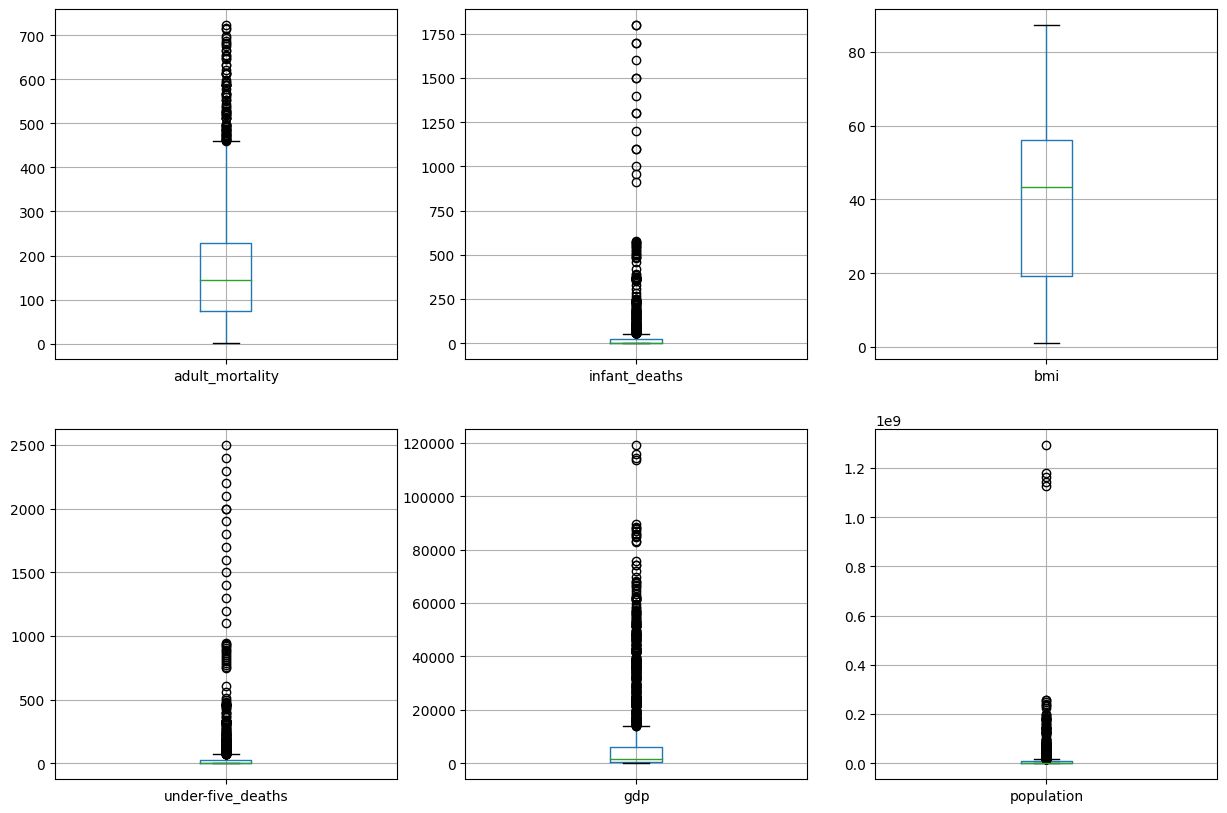

In [43]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

There are a few of the above that could simply be outliers, but there are some that almost certainly have to be errors of some sort. Of the above variables, changes to null will be made for the following since these numbers don't make any sense:

1. Adult mortality rates lower than the 5th percentile
2. Infant deaths of 0
3. BMI less than 10 and greater than 50
4. Under Five deaths of 0

In [44]:
mort_5_percentile = np.percentile(df.adult_mortality.dropna(), 5)
df.adult_mortality = df.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
df['under-five_deaths'] = df['under-five_deaths'].replace(0, np.nan)

To check missing values in Each columns

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life                             2928 non-null   float64
 4   adult_mortality                  2783 non-null   float64
 5   infant_deaths                    2090 non-null   float64
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              1482 non-null   float64
 11  under-five_deaths                2153 non-null   float64
 12  polio               

Because there appear to be a significant number of null values, it may be more useful to break down the data into those that contain nulls in order to investigate further.

The function below tries to accomplish this by only returning columns with (explicit) nulls, keeping a running total of those columns with nulls as well as their location in the dataframe, and returning the count of nulls in a given column as well as the percent of nulls out of all the values in the column.

In [46]:
def nulls_breakdown(df=df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [47]:
nulls_breakdown()

[iloc = 3] life has 10 null values: 0.34% null
[iloc = 4] adult_mortality has 155 null values: 5.28% null
[iloc = 5] infant_deaths has 848 null values: 28.86% null
[iloc = 6] alcohol has 194 null values: 6.6% null
[iloc = 8] hepatitis_b has 553 null values: 18.82% null
[iloc = 10] bmi has 1456 null values: 49.56% null
[iloc = 11] under-five_deaths has 785 null values: 26.72% null
[iloc = 12] polio has 19 null values: 0.65% null
[iloc = 13] total_expenditure has 226 null values: 7.69% null
[iloc = 14] diphtheria has 19 null values: 0.65% null
[iloc = 16] gdp has 448 null values: 15.25% null
[iloc = 17] population has 652 null values: 22.19% null
[iloc = 18] thinness_10-19_years has 34 null values: 1.16% null
[iloc = 19] thinness_5-9_years has 34 null values: 1.16% null
[iloc = 20] income_composition_of_resources has 167 null values: 5.68% null
[iloc = 21] schooling has 163 null values: 5.55% null
Out of 22 total columns, 16 contain null values; 72.73% columns contain null values.


# Dealing with Missing Values

Nearly half of the BMI variable's values are null, it is likely best to remove this variable altogether.

In [48]:
df.drop(columns='bmi', inplace=True)

In [49]:
nulls_breakdown()

[iloc = 3] life has 10 null values: 0.34% null
[iloc = 4] adult_mortality has 155 null values: 5.28% null
[iloc = 5] infant_deaths has 848 null values: 28.86% null
[iloc = 6] alcohol has 194 null values: 6.6% null
[iloc = 8] hepatitis_b has 553 null values: 18.82% null
[iloc = 10] under-five_deaths has 785 null values: 26.72% null
[iloc = 11] polio has 19 null values: 0.65% null
[iloc = 12] total_expenditure has 226 null values: 7.69% null
[iloc = 13] diphtheria has 19 null values: 0.65% null
[iloc = 15] gdp has 448 null values: 15.25% null
[iloc = 16] population has 652 null values: 22.19% null
[iloc = 17] thinness_10-19_years has 34 null values: 1.16% null
[iloc = 18] thinness_5-9_years has 34 null values: 1.16% null
[iloc = 19] income_composition_of_resources has 167 null values: 5.68% null
[iloc = 20] schooling has 163 null values: 5.55% null
Out of 21 total columns, 15 contain null values; 71.43% columns contain null values.


Because there appear to be many columns with null values, and because this is time series data ordered by nation, the best course of action is to interpolate the data by country. When attempting to interpolate by nation, however, no values are filled in because the countries' data for all the null values is null for each year, therefore imputation by year may be the best option.The mean of each year is computed as follows.

In [50]:
imputed_data = []
for year in list(df.year.unique()):
    year_data = df[df.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

All the missing values have been treated becasuse of the function above

In [51]:
nulls_breakdown(df)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


# Outliers

1. Detect the outliers
    Boxplots/histograms
    Tukey's Method
2. Deal with outliers
    Drop outliers
    Limit/Winsorize outliers

# Outlier Detection

    To visually see if there are any outliers, a boxplot and histogram will be constructed for each continuous variable.

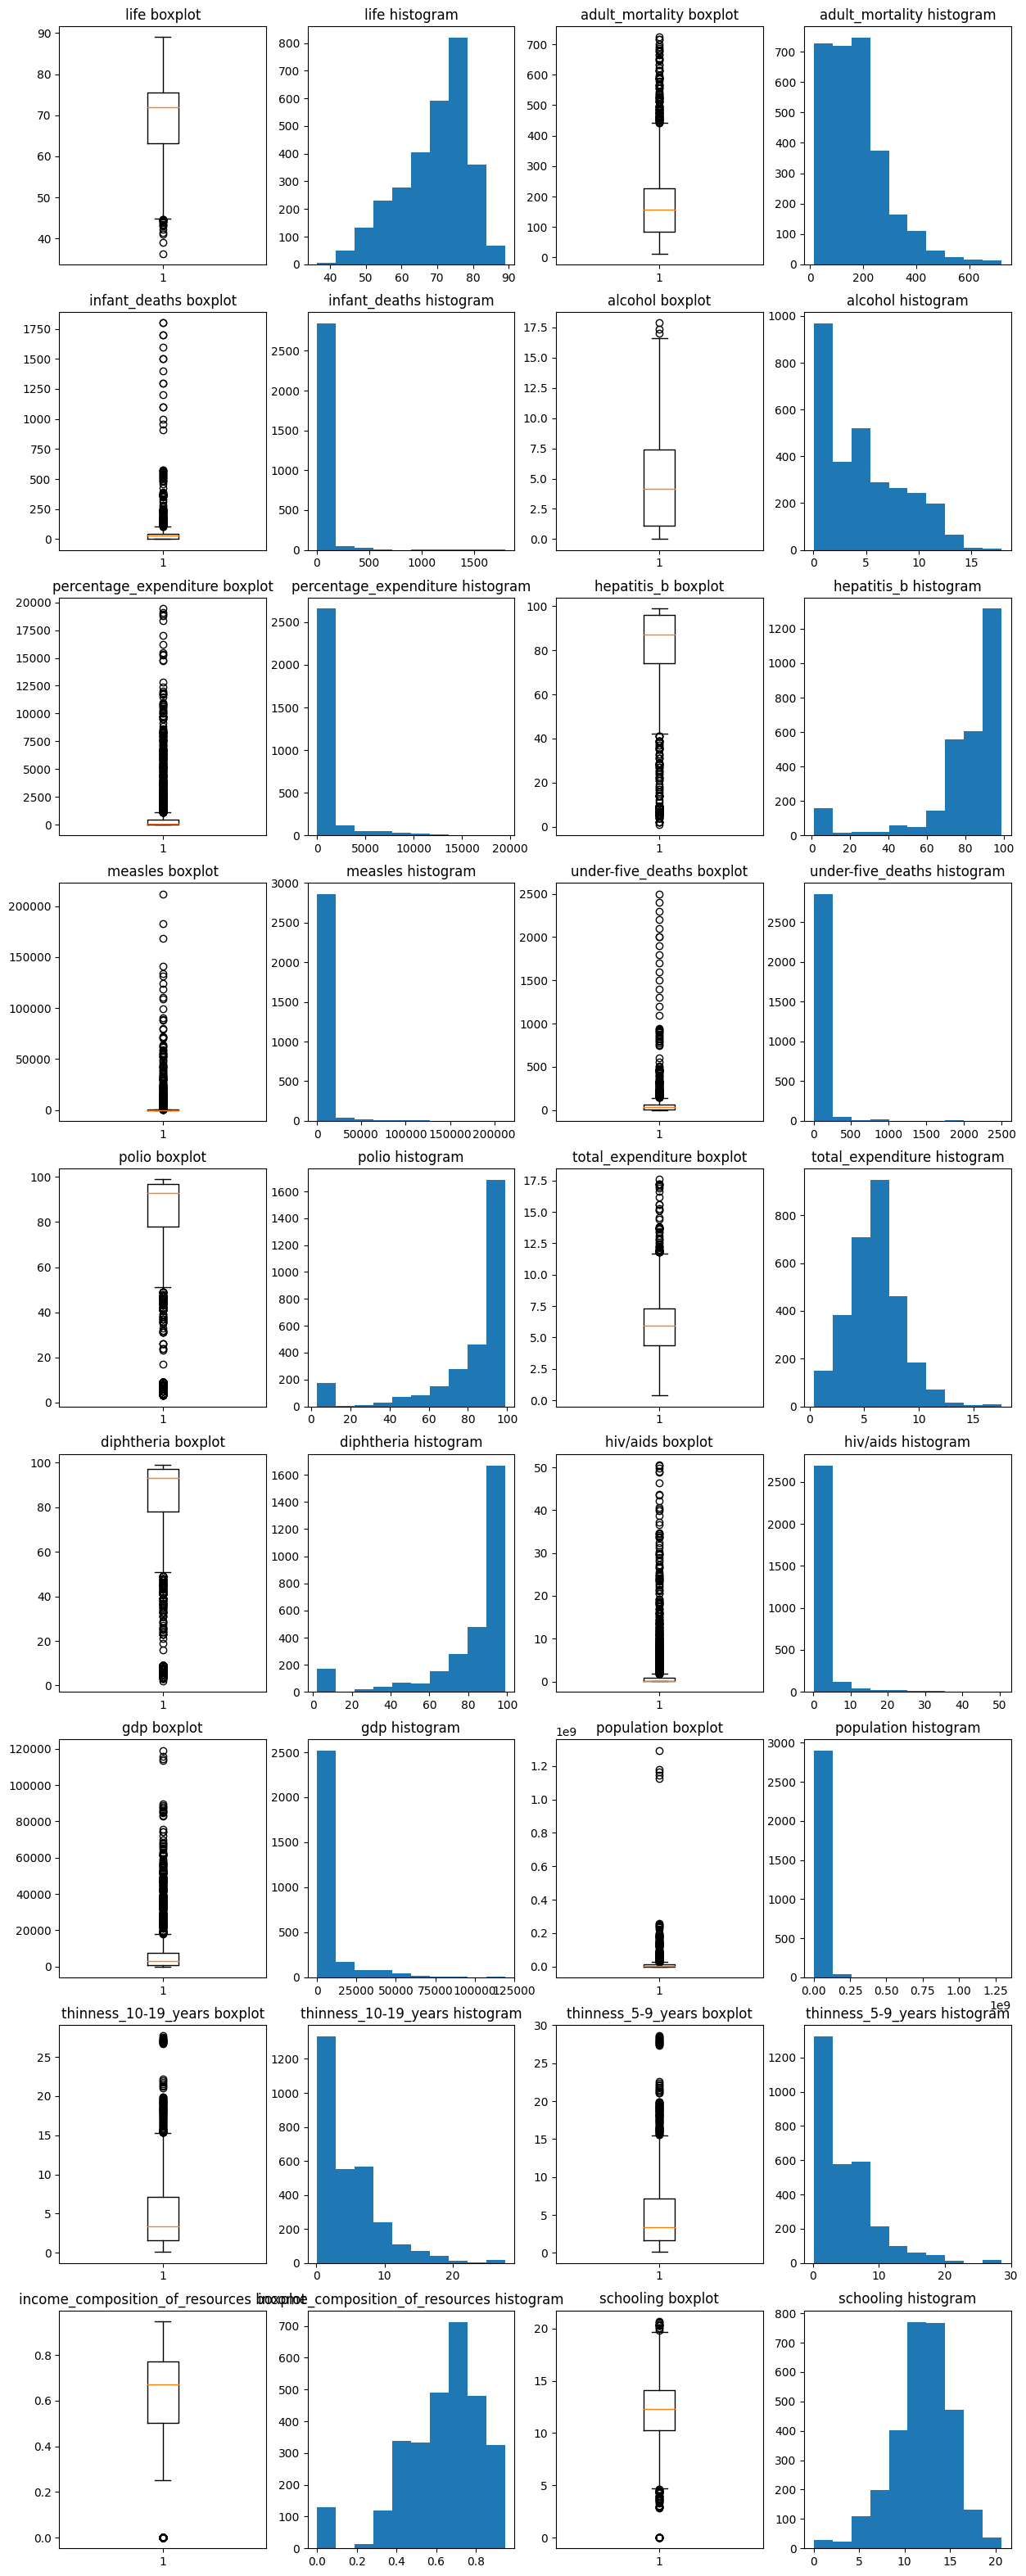

In [52]:
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(df)

    There are a lot of outliers for all of these variables, including the goal variable, life expectancy, as can be shown visually. Using Tukey's method, the same will be done statistically, with outliers defined as anything outside of 1.5 times the IQR.

In [53]:
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [54]:
for col in cont_vars:
    outlier_count(col)

---------------life---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 97
Percent of data that is outlier: 3.3%
---------------infant_deaths---------------
Number of outliers: 135
Percent of data that is outlier: 4.59%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 222
Percent of data that is outlier: 7.56%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------under-five_deaths---------------
Number of outliers: 142
Percent of data that is outlier: 4.83%
---------------polio---------------
Number of outliers: 279
Percent of data that is outlier: 9.5%
---------------total_expenditure---------------
Number of 

    It appears there are a decent amount of outliers in this dataset.

# Dealing with Outliers

1. Remove the outliers (best avoided in order to keep as much information as possible)
2. Set upper and/or lower boundaries for values (Winsorize the data)
3. Transform the data (logarithm, inverse, square root, and so on).
    advantage: can 'normalise' data and remove outliers 
    disadvantage: can't be applied to variables with values of 0 or less

    Because each variable has a different number of outliers and outliers on both sides of the data, the ideal approach is to winsorize (limit) the values for each variable separately until no outliers remain. By going variable by variable, with the flexibility to select a lower and/or upper limit for winsorization, the code below allows me to do just that.
    
    By default, the function will display two boxplots for the variable side by side (one boxplot of the original data, and one with the winsorized change). The winsorized data will be kept in the wins dict dictionary so that it may be conveniently retrieved later after a suitable limit has been determined (by visual examination).

In [55]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

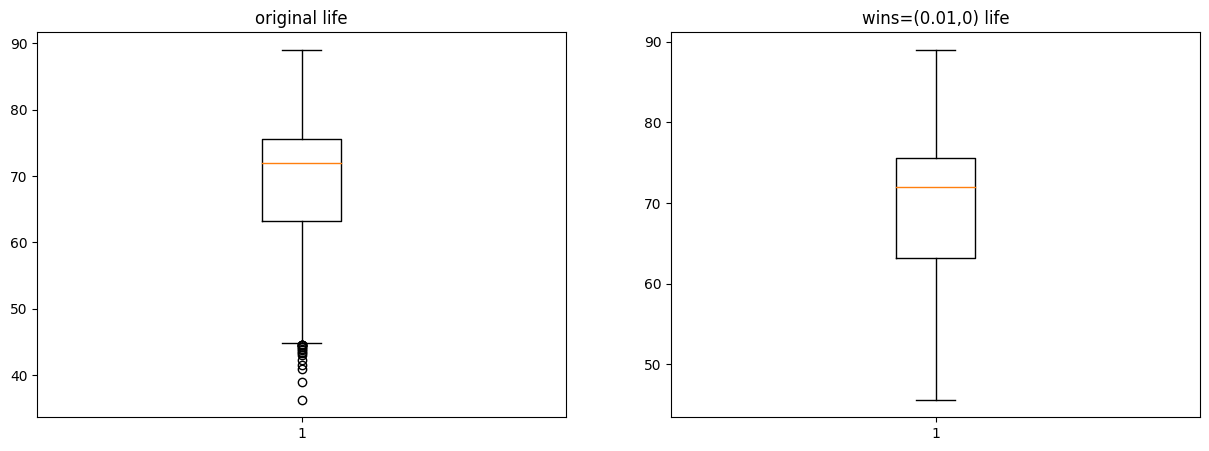

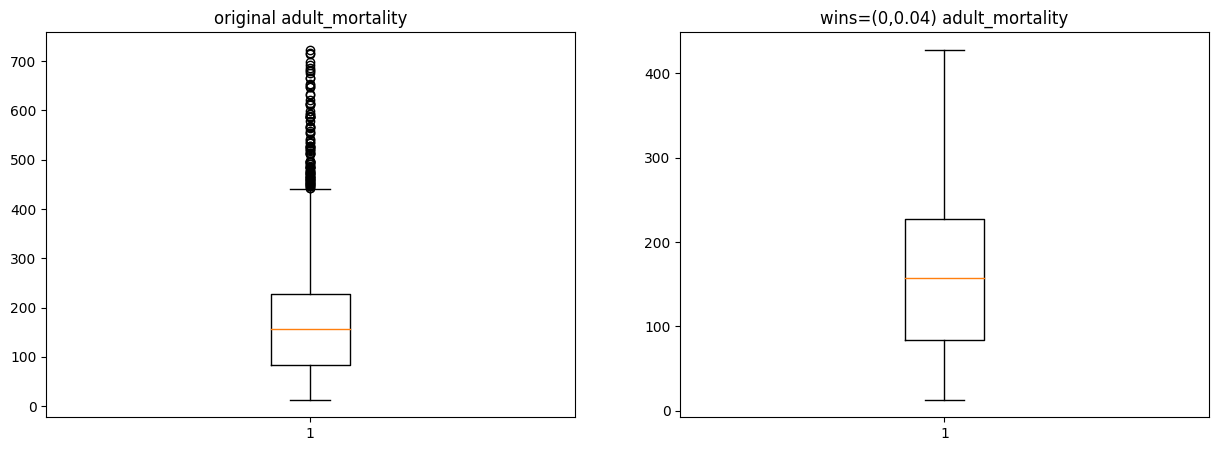

In [56]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=True)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=False)

    All of the variables have now been winsorized as little as possible in order to preserve as much data as feasible while still removing outliers. Finally, little boxplots for each variable's winsorized data will be provided to demonstrate that the outliers have been dealt with.

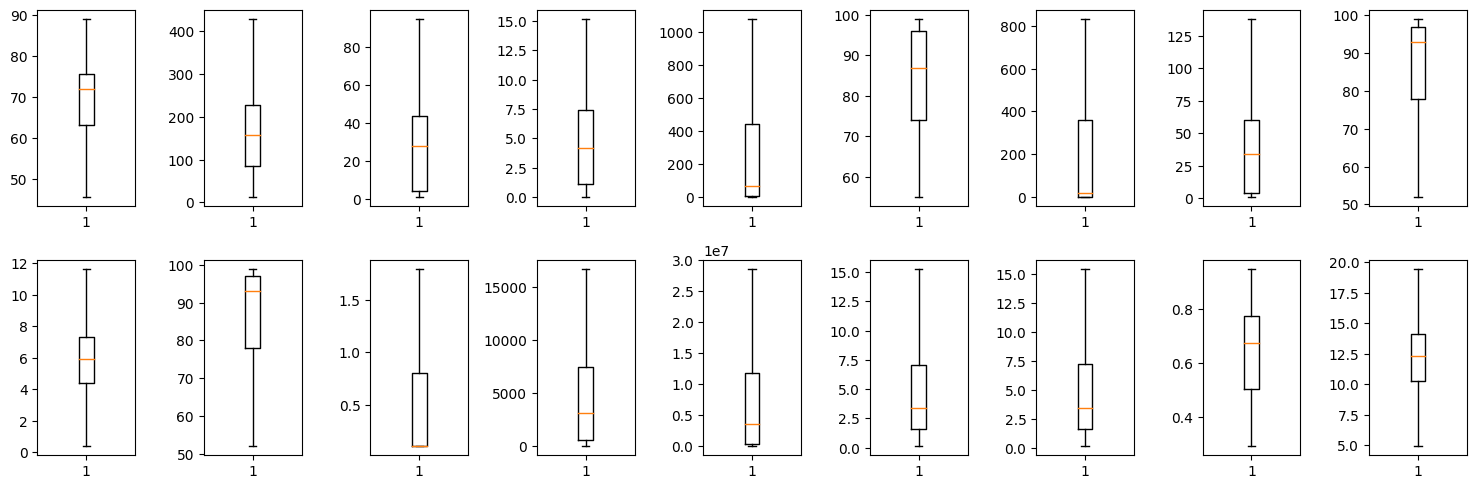

In [57]:
plt.figure(figsize=(15,5))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(wins_dict[col])
plt.tight_layout()
plt.show()

    The data cleaning section is now complete, with the exception of the outliers.

# Data Exploration

To just see the spread of the column values

In [72]:
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

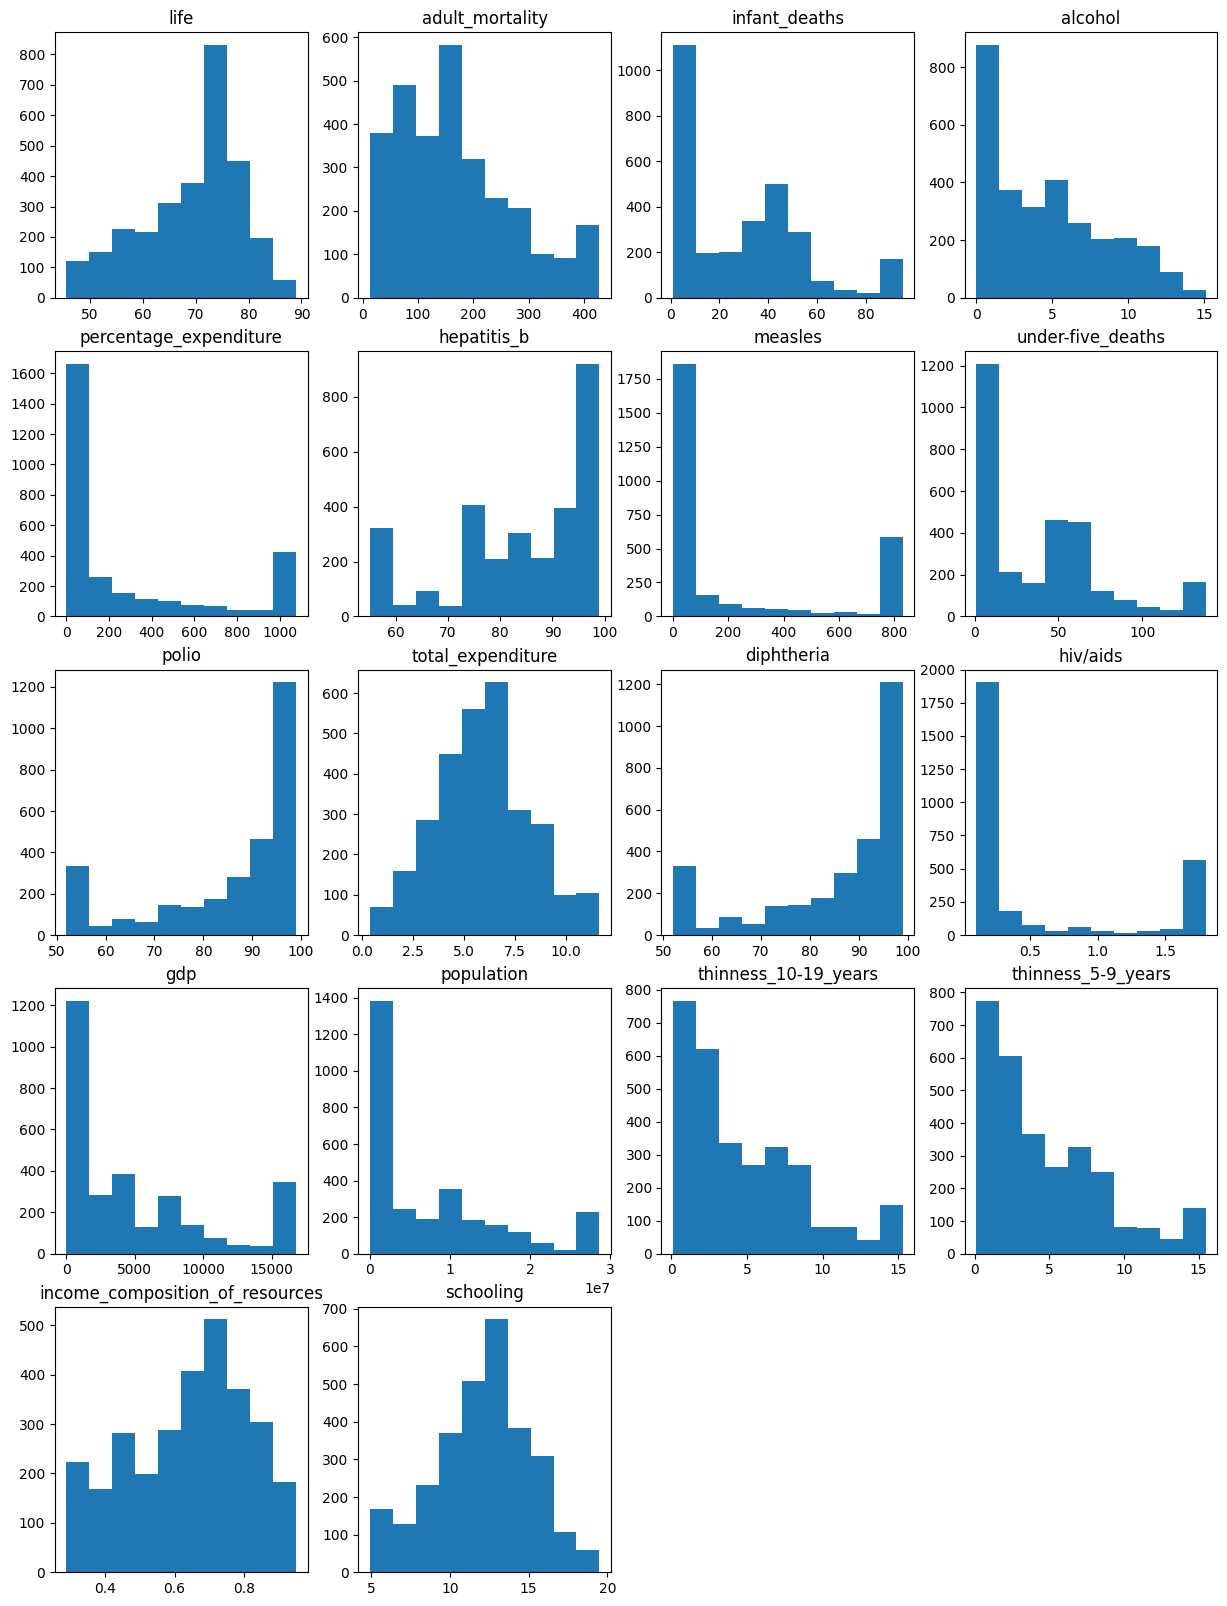

In [59]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(wins_df[col])
    plt.title(col)

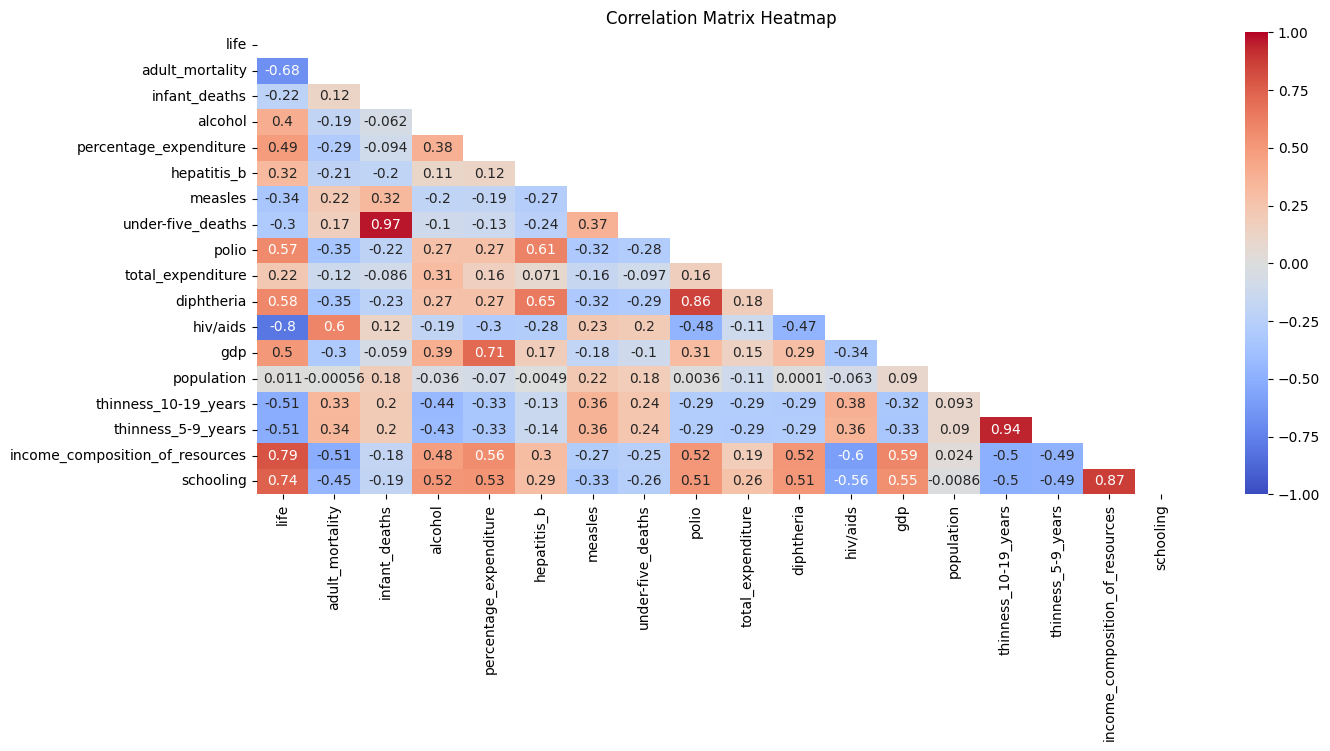

In [60]:
mask = np.triu(wins_df[cont_vars].corr())
plt.figure(figsize=(15,6))
sns.heatmap(wins_df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Some general takeaways from the graphic above:

1. Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:
2. Adult Mortality (negative)
3. HIV/AIDS (negative)
4. Income Composition of Resources (positive)
5. Schooling (positive)
6. Life expectancy (target variable) is extremely lowly correlated to population (nearly no correlation at all)
7. Infant deaths and Under Five deaths are extremely highly correlated
8. Percentage Expenditure and GDP are relatively highly correlated
9. Hepatitis B vaccine rate is relatively positively correlated with Polio and Diphtheria vaccine rates
10. Polio vaccine rate and Diphtheria vaccine rate are very positively correlated
11. HIV/AIDS is relatively negatively correlated with Income Composition of Resources
12. Thinness of 5-9 Year olds rate and Thinness of 10-15 Year olds rate is extremely highly correlated
13. Income Composition of Resources and Schooling are very highly correlated

# Life Expectancy Country-wise

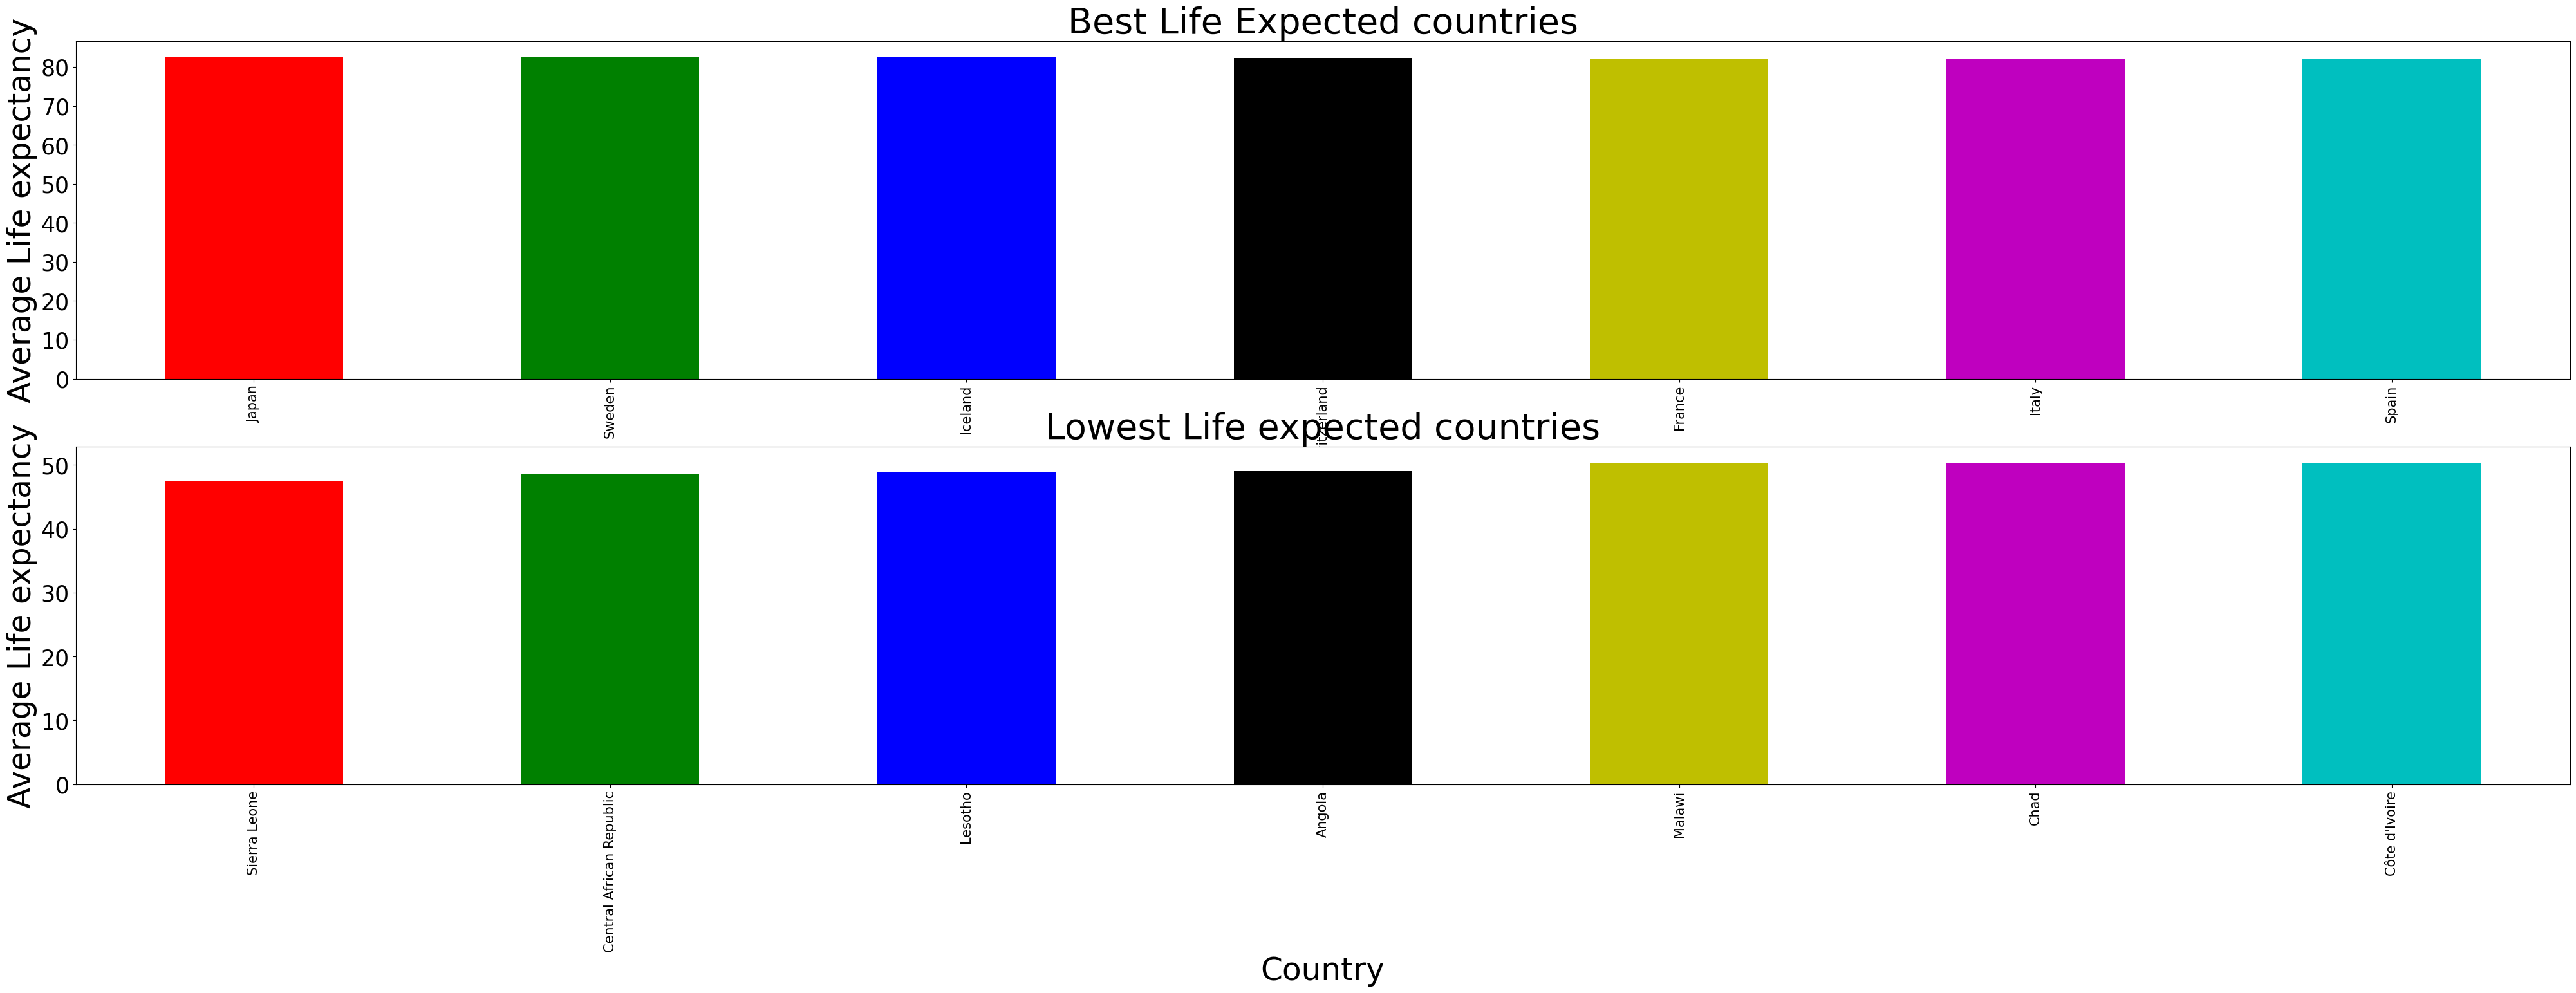

In [80]:
top_5_countries = wins_df.groupby('country')['life'].mean().sort_values(ascending=False).head(7)
top_5_countries 
my_colors = list('rgbkymc')
plt.subplot(2,1,1)
top_5_countries.plot(kind='bar', figsize=(50,15), fontsize=25,color=my_colors)
plt.title("Best Life Expected countries",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Average Life expectancy",fontsize=35)
plt.tick_params(axis='x', which='major', labelsize=15)

bottom_5_countries = wins_df.groupby('country')['life'].mean().sort_values(ascending=True).head(7)
bottom_5_countries 
my_colors = list('rgbkymc')
plt.subplot(2,1,2)
bottom_5_countries.plot(kind='bar', figsize=(50,15), fontsize=25,color=my_colors)
plt.title("Lowest Life expected countries",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Average Life expectancy",fontsize=35)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

### What is the country with the highest life expectancy and what is the one with lowest

    Japan is the country with the highest Life expectancy value followed by Sweden and Sierra Leone has the lowest Life expectancy value

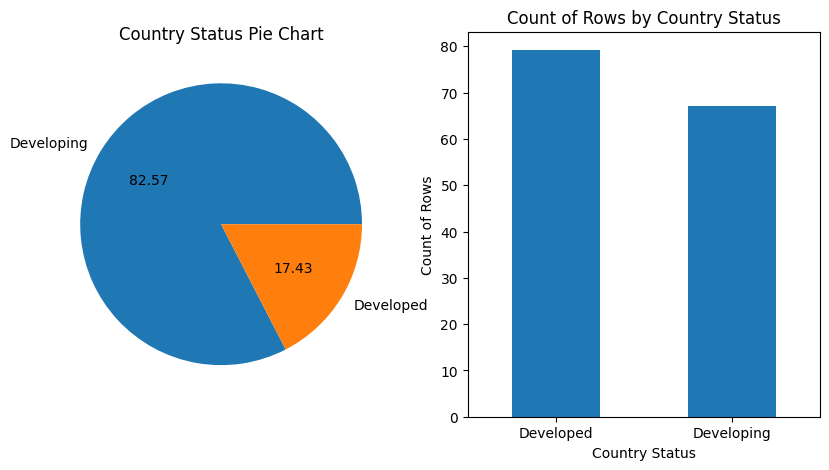

In [83]:
plt.figure(figsize=(10, 5))
plt.subplot(122)
wins_df.groupby("status")["life"].mean().plot(kind='bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)

plt.subplot(121)
wins_df.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

##  Life Expectancy Comparison in Developed and Developing Countries

    There are many more developing countries in the world than developed, and the average life expectancy of the developed countries is higher than other.

### How different dieseases affect life expectancy in developed and developing countries
    First, looking at how life expectancy has changed over the years may be helpful.

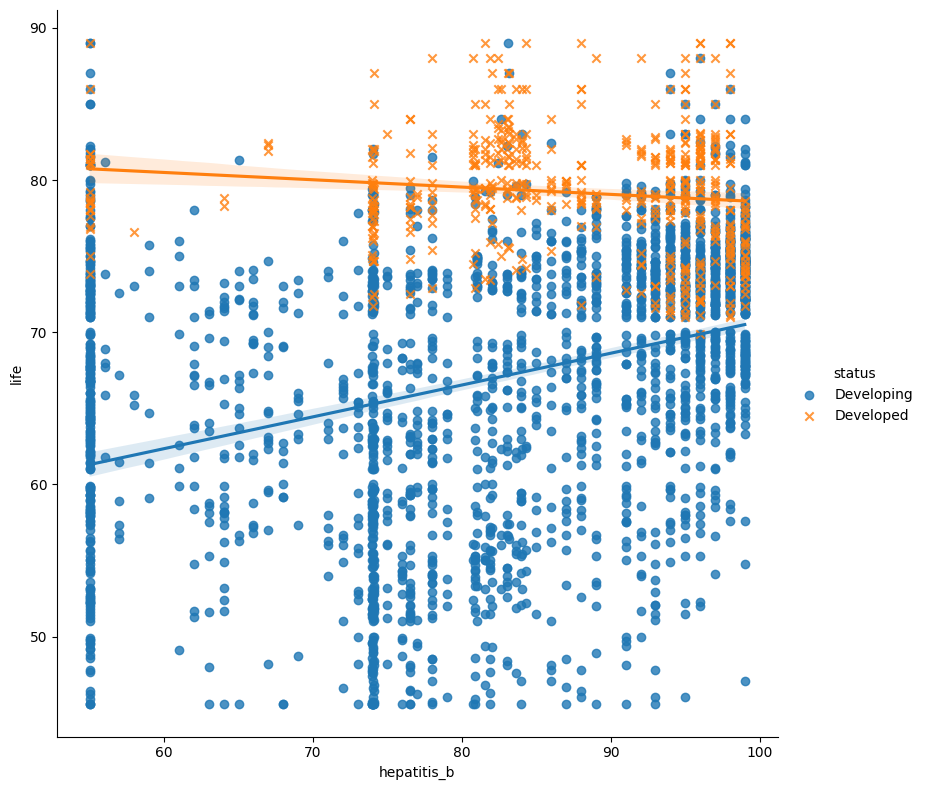

In [63]:
sns.pairplot(wins_df, x_vars=["hepatitis_b"], y_vars=["life"],
            hue="status",markers=["o", "x"], height=8, kind="reg");

    There is a slight decrease in the life expectancy value in case of developed countries whereas in case of Developed countries the life expectancy value is gradually rising which means that developing countries are taking measures for setting up vaccine of hepatitis B

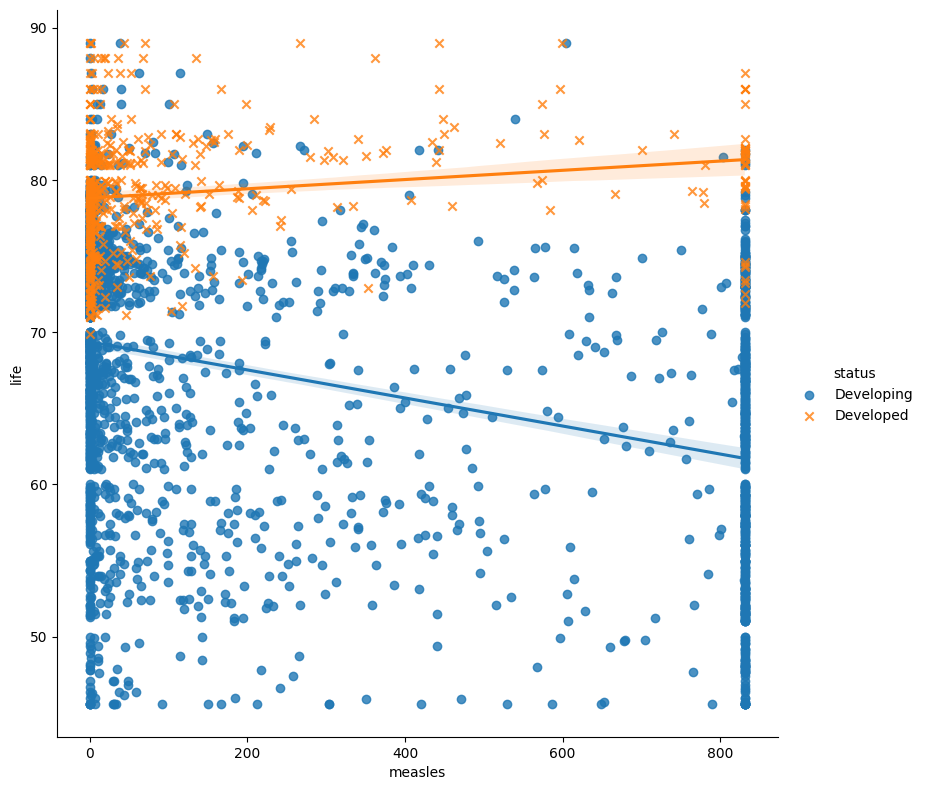

In [64]:
sns.pairplot(wins_df, x_vars=["measles"], y_vars=["life"],
             hue="status",markers=["o", "x"], height=8, kind="reg");

    In case of Measles, according to the graph the developed countries seems to have vaccines available to tackle measles whereas developing countries life expectancy values is decreasing day by day maybe because of lack of resources to handle measles

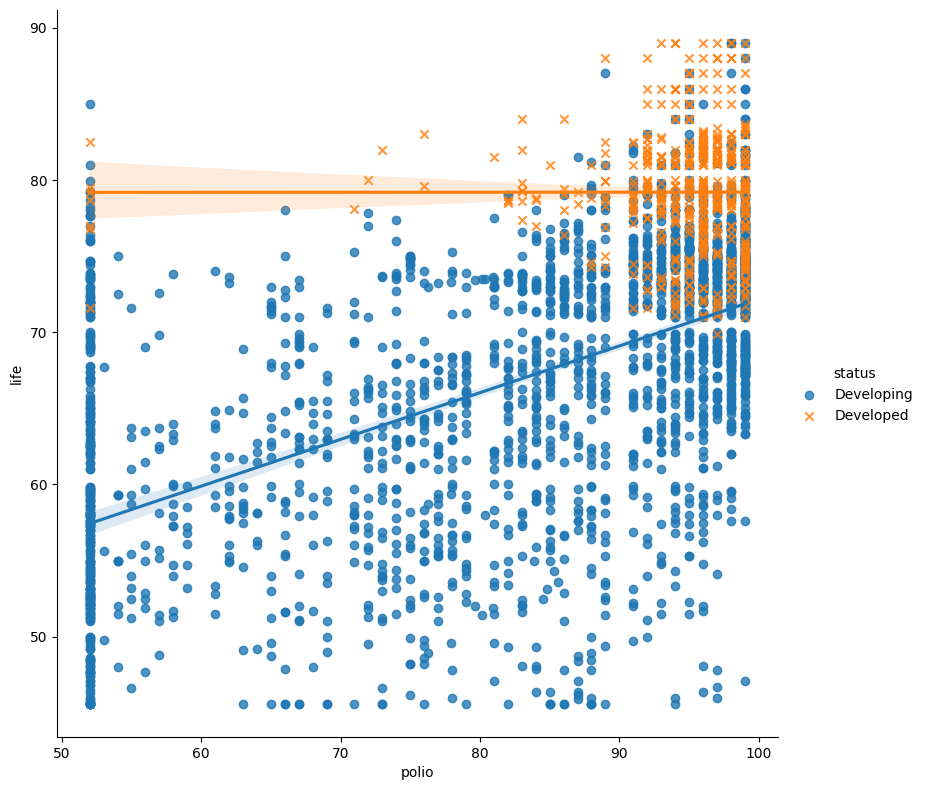

In [65]:
sns.pairplot(wins_df, x_vars=["polio"], y_vars=["life"],
             hue="status",markers=["o", "x"], height=8, kind="reg");

    Developed countries seems to have successfully eradicated polio diesease because of vaccines whereas in developing countries there was low expectancy value initially but now it is gradually increasing maybe because of proper doses being given

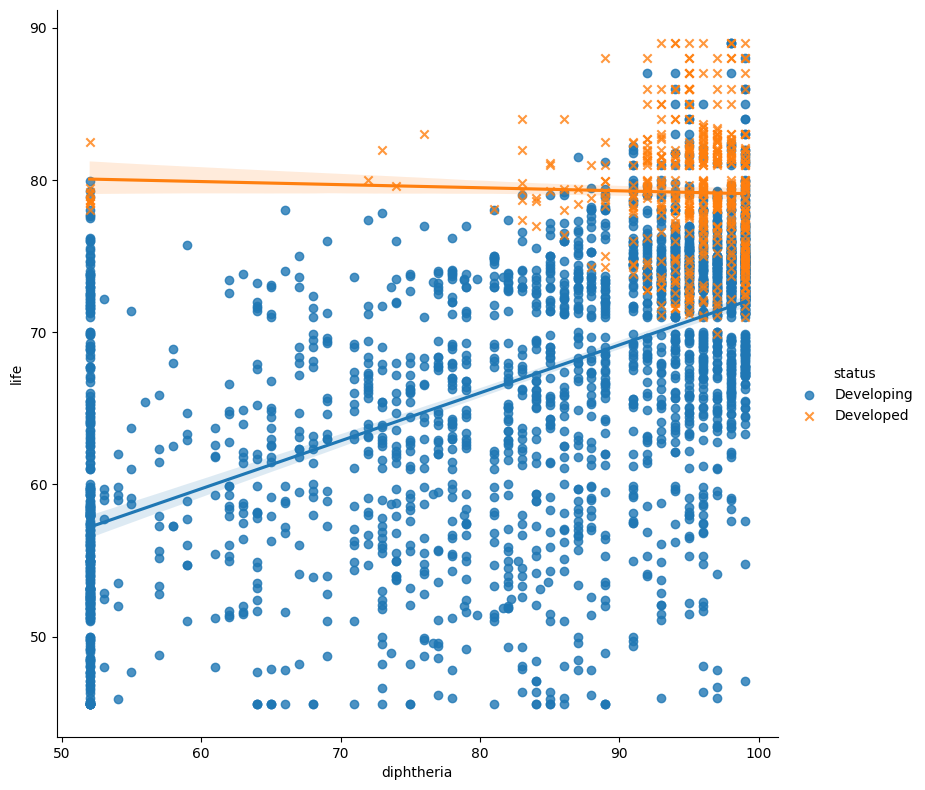

In [66]:
sns.pairplot(wins_df, x_vars=["diphtheria"], y_vars=["life"],
             hue="status",markers=["o", "x"], height=8, kind="reg");

    Developed countries seems to have successfully eradicated diptheria diesease because of vaccines whereas in developing countries there was low expectancy value initially but now it is gradually increasing maybe because of proper doses being given

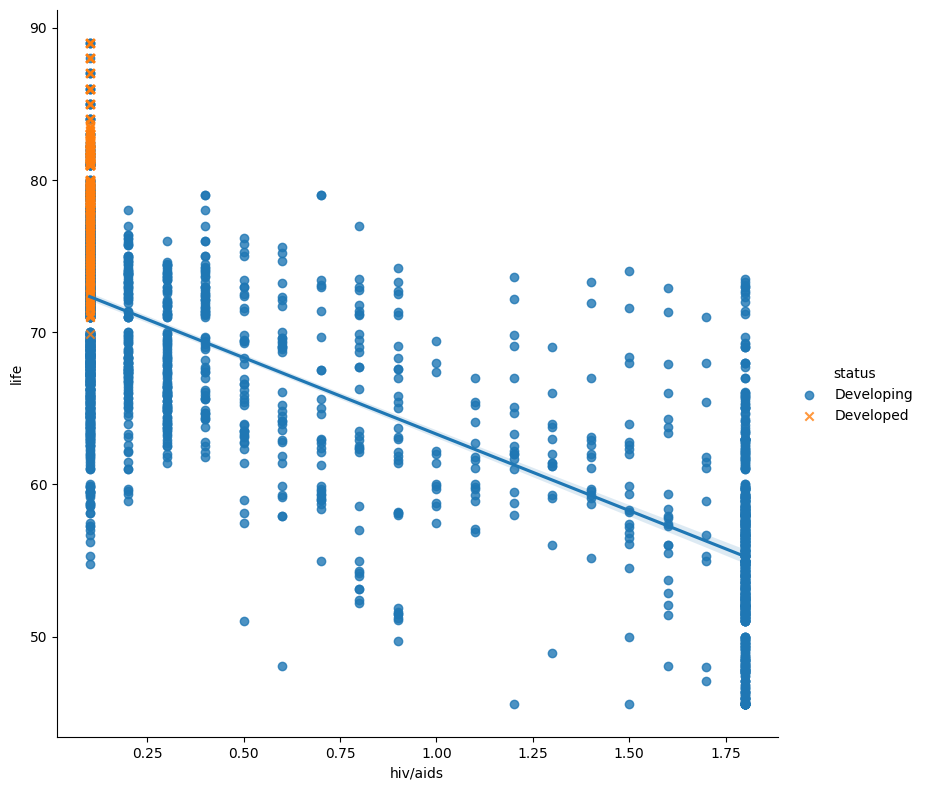

In [67]:
sns.pairplot(wins_df, x_vars=["hiv/aids"], y_vars=["life"],
             hue="status",markers=["o", "x"], height=8, kind="reg");

    The graph shows that developing countries still have not been able to handle hiv/aids at all as the life expectancy value is decreasing at a rapid range. This can be due to rising population and no education been given

### What effect does Schooling and Alcohol have on Life Expectancy

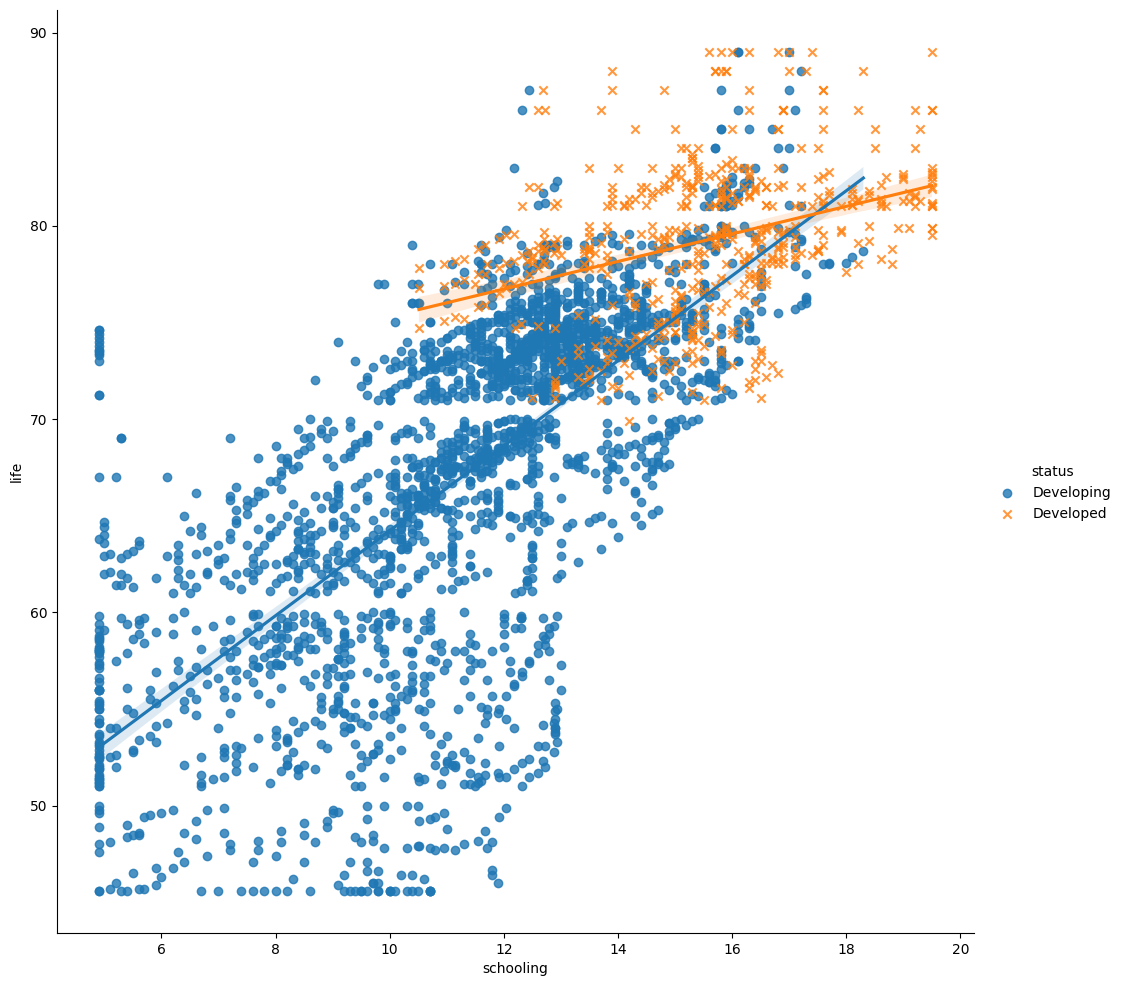

In [68]:
sns.pairplot(wins_df, x_vars=["schooling"], y_vars=["life"],
             hue="status",markers=["o", "x"], height=10, kind="reg")
plt.show()

    Schooling can effect life expectancy more in developing countries than developed countries. This may be because education is more established and prevalent in wealthier countries. 

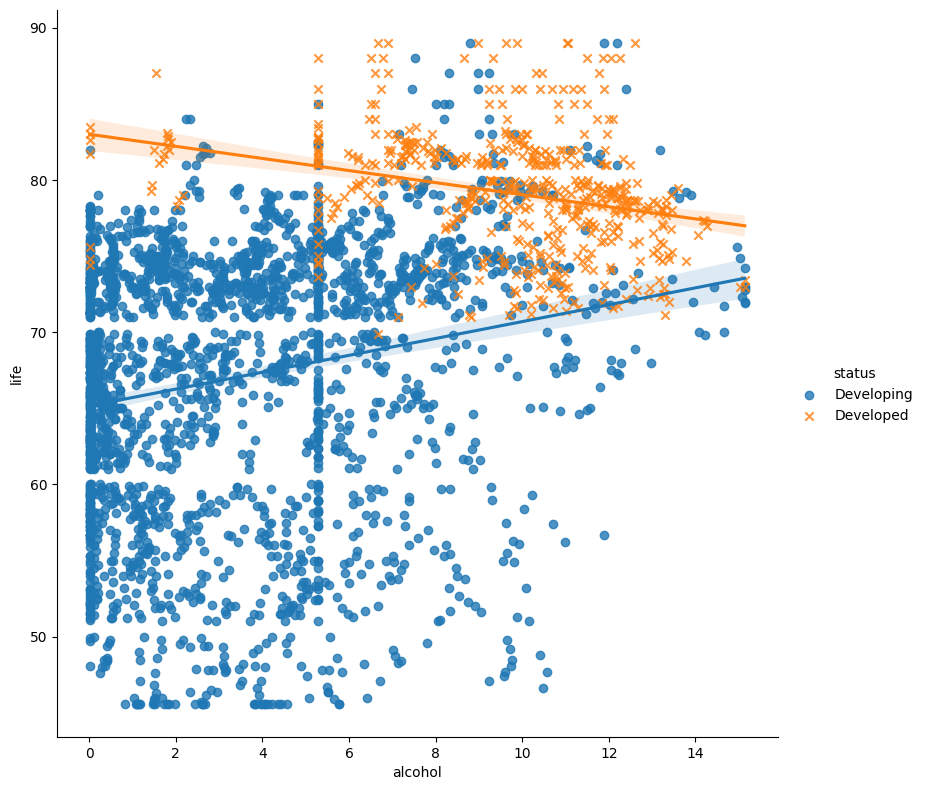

In [71]:
sns.pairplot(wins_df, x_vars=["alcohol"], y_vars=["life"],
             hue="status",markers=["o", "x"], height=8, kind="reg")

plt.show()

    I’m guessing that this is due to the fact that only wealthier countries can afford alcohol or the consumption of alcohol is more prevalent among wealthier populations.

    That is why developing countries and alcohol have positive relation and developed countries and alcohol have negative relation.

# CONCLUSION

1. The dataset although collected by WHO contained a lot of missing values and we saw that most of the missing values were from the countries with very less population and were data collection is a very tedious task.
2. A lot of outliers were detected which were dealt by Winsorization
2. Japan although being hit badly by world war II came back very strong and is currently the country with the highest life expectancy followed by Sweden which is a big Achievement.
3. We largely saw how developing countries have very less life expectancy when we see diseases like HIV/AIDS, polio etc and how Schooling plays a big role in increasing the life expectancy of developing countries as people become much more educated and help improve the welfare and healthcare of the country along with economy
4. Alcoholism is a big issue in the developed country where people have good amount of money to spend and this shows how careless are people in terms of their health when it comes to alcoholism

# Recommendation

1. The Developed countries should help developing countries in eradicating the diseases which are affecting the life of the people by providing vaccinations 
2. The government should focus more on the schooling of the kids which will become face of the country in future and provide them with good food and educate them properly. 
3. The governemnt of developing countries should launch various schemes to motivate people to send their kids to schools 
4. Government should organize free healthcare camps to provide free vaccinations for the needy and poor people so that they dont have to spend their precious money and they also stay healthy to treat their families well. 
5. The government should increase the subsidiy on liquor and increase healthcare and welfare camps to generate awareness among people, how band overdrinking is and how it affects your body.
6. WHO should with the help of developed nations should help the governemnt of developing countries in providing free food and education and organize healthcare camps